In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from termcolor import colored
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from imblearn.under_sampling import RandomUnderSampler


In [2]:
#za stablo ne treba transformisati jer nam je svejedno za granice

In [3]:
df = pd.read_csv('../../dataset/weatherClean.csv')

In [4]:
df.describe(include='all')


,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,RainTomorrow,Month
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.221213,12.186400,2.349974,5.302343,7.377594,9.433756,39.984292,8.202239,9.092649,14.001988,18.637576,68.843810,51.482606,1017.653758,4.389750,4.258511,0.221213,0.224181,6.402544
std,0.064960,6.388924,8.423217,4.147637,3.898898,5.188836,13.138385,5.515461,5.107987,8.851082,8.721551,18.932077,20.532065,6.746248,2.879055,2.745819,0.415065,0.417043,3.426506
min,0.067224,-8.500000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,980.500000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.185234,7.600000,0.000000,2.400000,4.400000,5.000000,31.000000,3.000000,5.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1.000000,1.000000,0.000000,0.000000,3.000000
50%,0.222714,12.000000,0.000000,4.400000,8.100000,9.000000,39.000000,8.000000,8.000000,13.000000,18.637576,70.000000,51.482606,1017.653758,5.000000,5.000000,0.000000,0.000000,6.000000
75%,0.266917,16.800000,0.800000,7.200000,10.500000,15.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,7.000000,7.000000,0.000000,0.000000,9.000000
max,0.363151,33.900000,371.000000,145.000000,14.500000,18.000000,135.000000,18.000000,18.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,9.000000,9.000000,1.000000,1.000000,12.000000


In [5]:
df.shape

(142193, 19)

In [6]:
df.isna().any()

Location         False
MinTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Cloud9am         False
Cloud3pm         False
RainToday        False
RainTomorrow     False
Month            False
dtype: bool

In [7]:
Y = df['RainTomorrow']
X = df.drop('RainTomorrow', axis=1)
feature_names = X.columns
X.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,Month
0,0.158714,18.2,0.0,10.0,0.0,1,48.0,1,18,26.0,22.0,17.0,9.0,1017.653758,0.0,7.0,0,3
1,0.067224,25.1,0.0,11.6,0.0,7,41.0,5,7,24.0,6.0,14.0,9.0,1012.800000,0.0,7.0,0,1
2,0.074293,21.1,0.0,14.8,0.0,12,70.0,17,17,26.0,19.0,13.0,9.0,1009.900000,0.0,7.0,0,11
3,0.067224,20.1,0.0,10.4,0.0,2,52.0,2,16,19.0,28.0,21.0,9.0,1002.500000,0.0,7.0,0,2
4,0.256935,9.0,0.0,13.2,0.0,16,89.0,1,17,30.0,41.0,33.0,13.0,1006.100000,0.0,7.0,0,12


In [8]:
X.shape


(142193, 18)

In [9]:
#nemamo balansirane rezultate, pa moramo da koristimo stratifikovanu podelu
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=41)

print(X_train.shape)
print(X_test.shape)

(113754, 18)
(28439, 18)


Outlier

In [10]:
def col_plot(df,col_name):
    plt.figure(figsize=(20,6))
    
    plt.subplot(141) 
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name])
    plt.xlabel("IQR=1.5")


    plt.show()


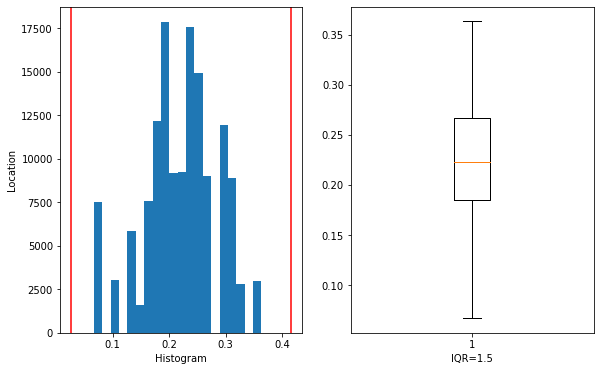

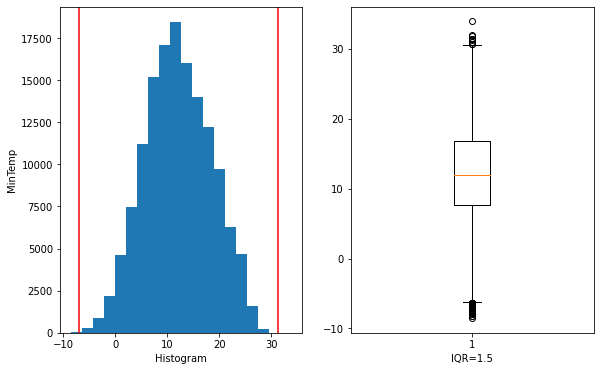

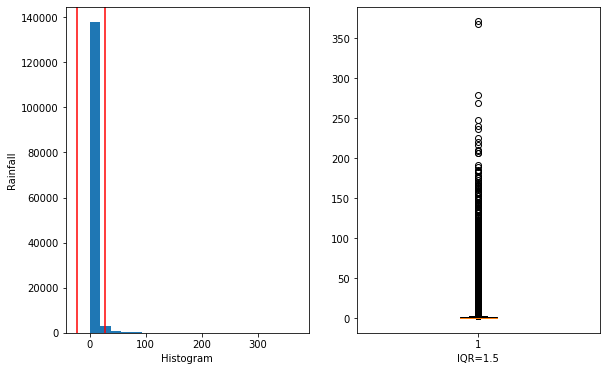

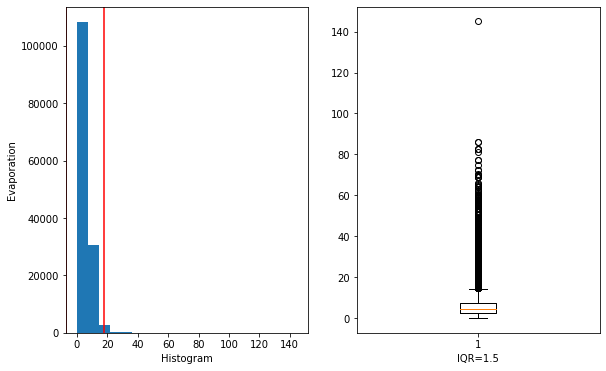

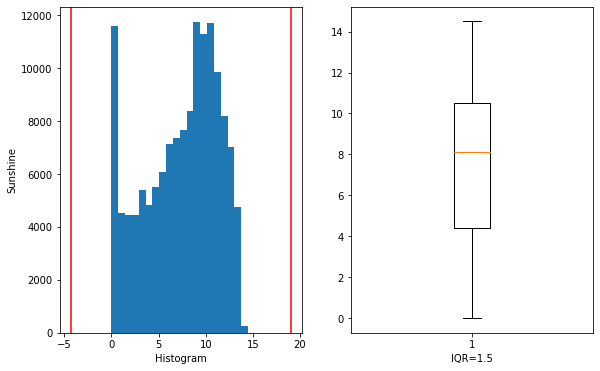

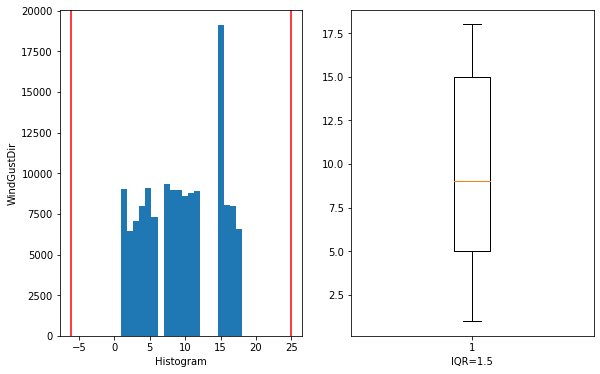

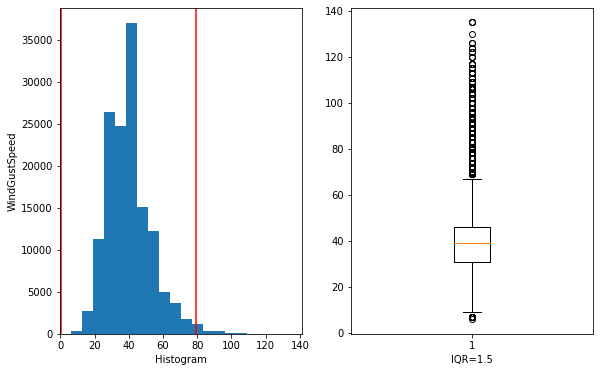

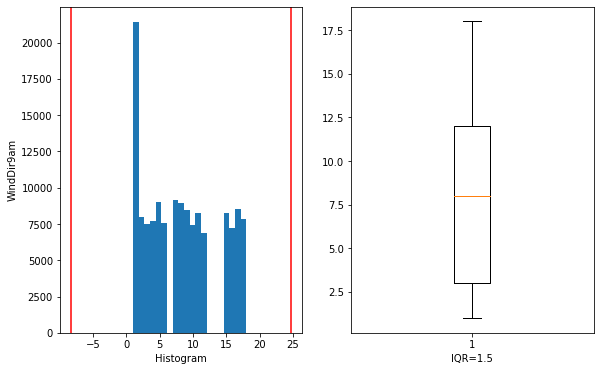

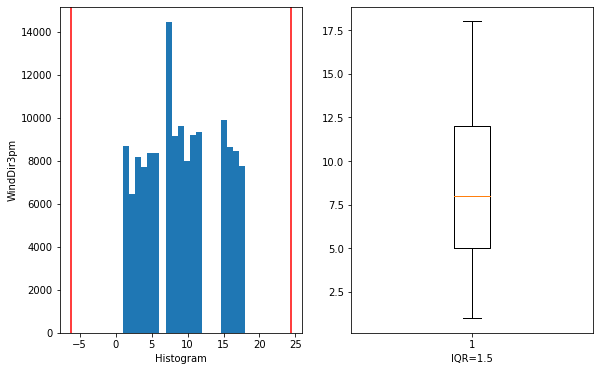

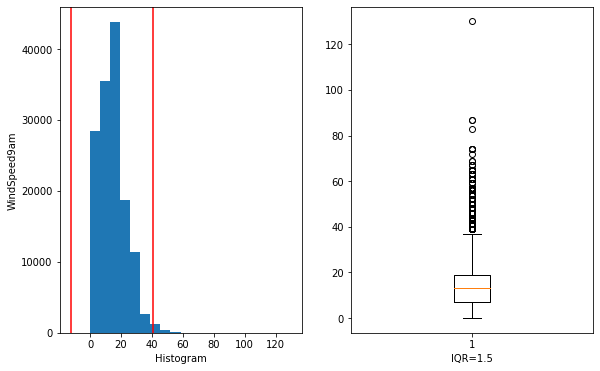

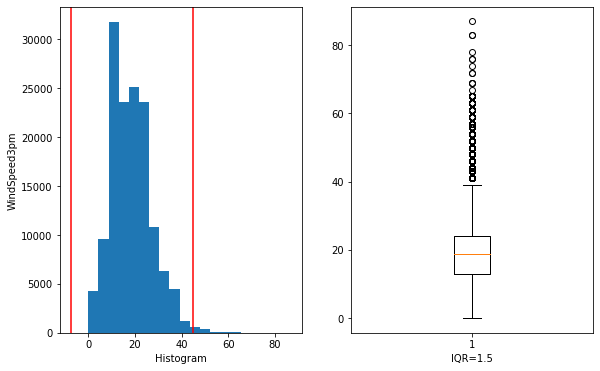

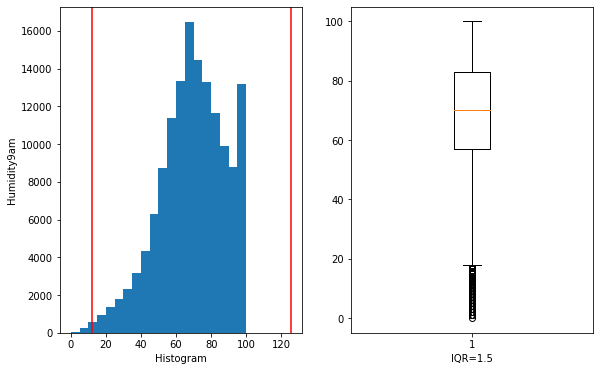

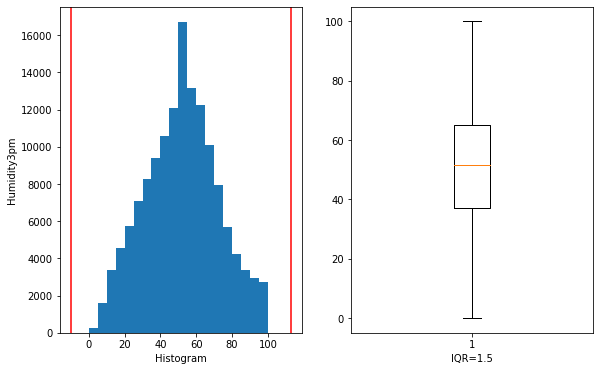

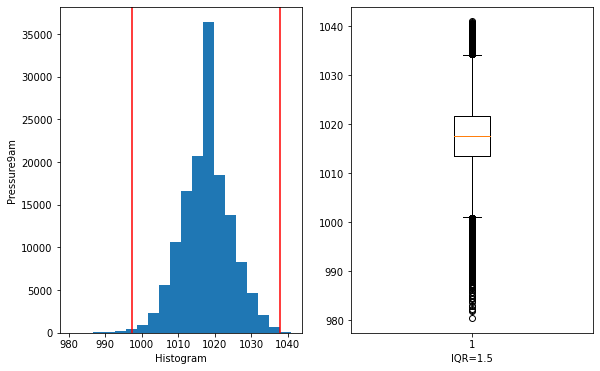

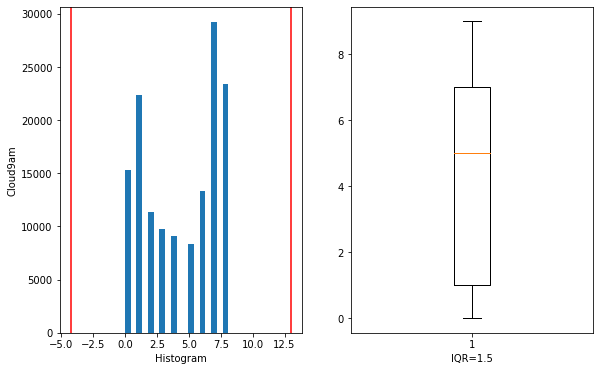

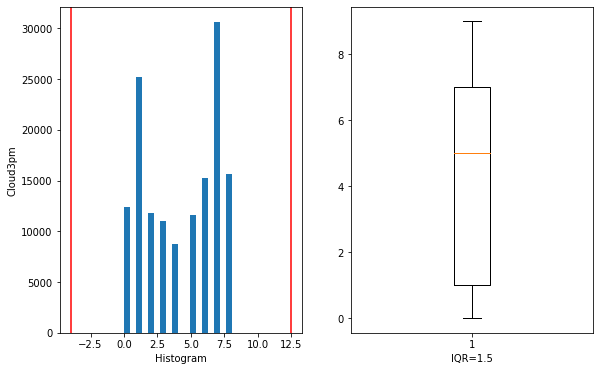

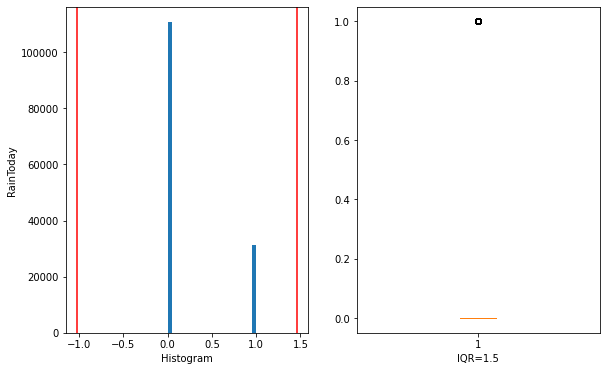

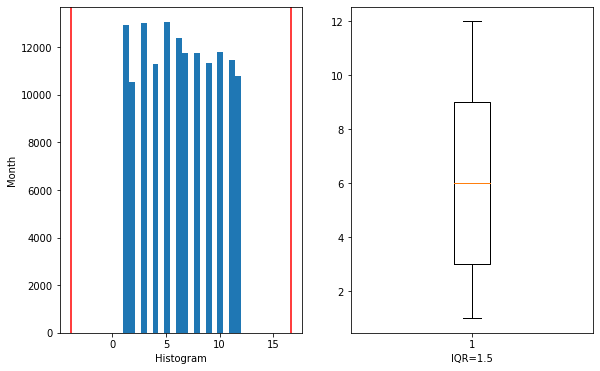

In [11]:
for i in X.columns:
    col_plot(X,i)

In [12]:
def find_boundaries(df, name):
    
    Q1=df[name].quantile(0.25)
    Q3=df[name].quantile(0.75)
    IQR=Q3-Q1
    lower_boundary = Q1-1.5*IQR
    upper_boundary = Q3+1.5*IQR
    return lower_boundary, upper_boundary


In [13]:
def outliers(name,df):
    lower_rainfall, upper_rainfall = find_boundaries(df, name)
    print('Gornja granica', upper_rainfall)
    print('Donja granica', lower_rainfall)
    outliers_rainfall = np.where(df[name] > upper_rainfall, True,
                            np.where(df[name] < lower_rainfall, True, False))

    print(outliers_rainfall)
    return len(df[outliers_rainfall]), outliers_rainfall



In [14]:
l, out = outliers('Evaporation',X_train)
X_train = X_train[~(out)]
Y_train = Y_train[~(out)]
print(len(df))

l, out = outliers('WindSpeed9am',X_train)
X_train = X_train[~(out)]
Y_train = Y_train[~(out)]
print(len(df))

Gornja granica 14.400000000000002
Donja granica -4.800000000000001
[False False False ... False False False]
142193
Gornja granica 37.0
Donja granica -11.0
[False False False ... False False False]
142193


In [15]:
X_train.shape

(109537, 18)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:>

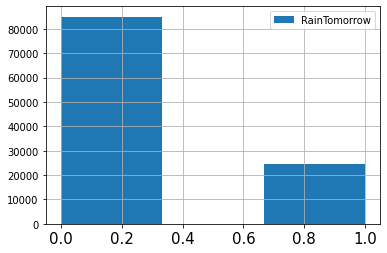

In [17]:
Y_train.hist(xlabelsize=15,bins=3,legend=True)
        

Model

In [18]:
#KOD PREUZET SA VEZBI
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
        
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['No', 'Yes'], index=['No', 'Yes']))
    print("---------------------------------------------------------------------------------")
    
    cm_matrix = pd.DataFrame(confusion_matrix(y, y_pred), index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['Yes', 'No'], feature_names=feature_names, filled=True, fontsize=10)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")


Model stabla bez podesavanja hiperparametara

In [19]:
tree = DecisionTreeClassifier(class_weight='balanced')
#bez balansiranja acc = 0.64

In [20]:
tree.fit(X_train, Y_train) # treninranje modela

DecisionTreeClassifier(class_weight='balanced')

In [21]:
print(f'Dubina stabla {tree.get_depth()}')
print(f'Broj listova {tree.get_n_leaves()}')

Dubina stabla 36
Broj listova 15699


Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       1.00      1.00      1.00     24544

    accuracy                           1.00    109537
   macro avg       1.00      1.00      1.00    109537
weighted avg       1.00      1.00      1.00    109537

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
        No    Yes
No   84990      3
Yes      0  24544
---------------------------------------------------------------------------------


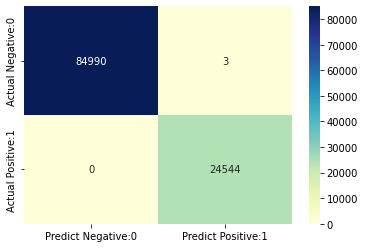

In [22]:
report(tree, X_train, Y_train)

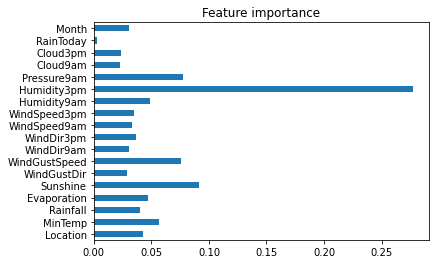

In [23]:
pd.Series(tree.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22064
           1       0.52      0.51      0.52      6375

    accuracy                           0.78     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.78      0.78      0.78     28439

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
        No   Yes
No   19069  2995
Yes   3123  3252
---------------------------------------------------------------------------------


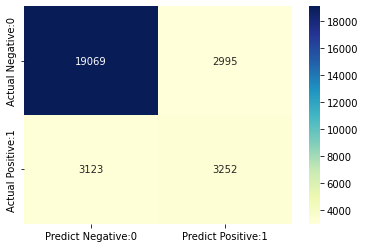

In [24]:
report(tree, X_test, Y_test,text = "test")


In [25]:
def imbalanced_fit(X_train, y_train, X_test, y_test, sampler):
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    print(f'X_resampled.shape={X_resampled.shape}')
    print(f'y value counts = {y_resampled.value_counts()}')
    
    
    model = DecisionTreeClassifier()
    model.fit(X_resampled, y_resampled)
    
    report(model, X_test,y_test)
    
    return model

X_resampled.shape=(49088, 18)
y value counts = 0    24544
1    24544
Name: RainTomorrow, dtype: int64
Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.71      0.79     22064
           1       0.41      0.69      0.52      6375

    accuracy                           0.71     28439
   macro avg       0.65      0.70      0.65     28439
weighted avg       0.78      0.71      0.73     28439

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
        No   Yes
No   15712  6352
Yes   1956  4419
---------------------------------------------------------------------------------


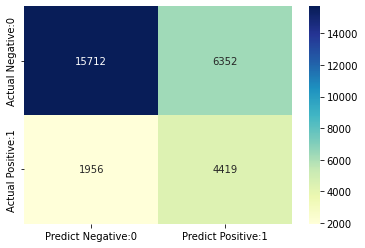

In [26]:
tree_under = imbalanced_fit(X_train, Y_train, X_test, Y_test,RandomUnderSampler())



Podesavanje hiper parametara

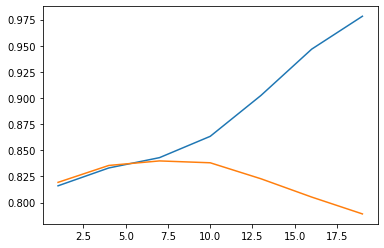

In [27]:
acc_tr = []
acc_test = []
it = []
#zelimo da vidimo kad dolazi do preprilagodjavanja, smemo samo da koristimo train skup, nikako test skup
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_train, Y_train, test_size=0.20, stratify=Y_train, random_state=41)

for max_d in range(1,21,3):
    model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
    model.fit(X_train_new, Y_train_new)
    acc_tr.append(model.score(X_train_new,Y_train_new))
    acc_test.append(model.score(X_test_new,Y_test_new))

    it.append(max_d)

plt.plot(it,acc_tr)    
plt.plot(it,acc_test)

In [28]:
params = {'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],   #min broj uzoraka za podelu
        'min_samples_leaf': [1, 3, 5],
        'random_state': [42]
         }

In [29]:
estimator = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=params, cv=3) 

In [30]:
estimator.fit(X_train, Y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]})

In [31]:
estimator.best_params_


{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 42}

In [32]:
estimator.best_score_


0.7842646398980241

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     84993
           1       0.51      0.76      0.61     24544

    accuracy                           0.78    109537
   macro avg       0.71      0.77      0.73    109537
weighted avg       0.83      0.78      0.80    109537

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
        No    Yes
No   67082  17911
Yes   5894  18650
---------------------------------------------------------------------------------


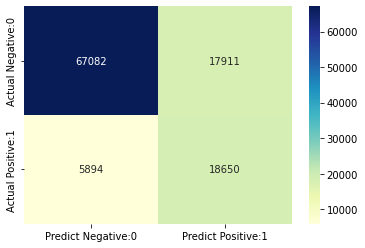

In [33]:
report(estimator.best_estimator_, X_train, Y_train)


Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.79      0.84     22064
           1       0.50      0.74      0.59      6375

    accuracy                           0.77     28439
   macro avg       0.70      0.76      0.72     28439
weighted avg       0.82      0.77      0.79     28439

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
        No   Yes
No   17340  4724
Yes   1685  4690
---------------------------------------------------------------------------------


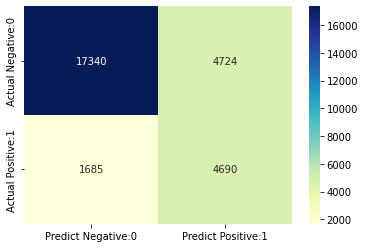

In [34]:
report(estimator.best_estimator_, X_test, Y_test, "test")


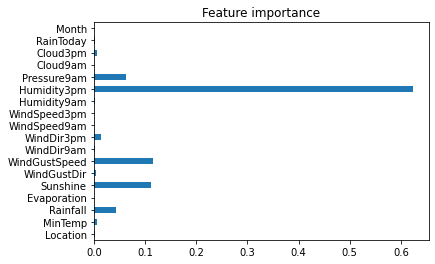

In [35]:
pd.Series(estimator.best_estimator_.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")
plt.show()

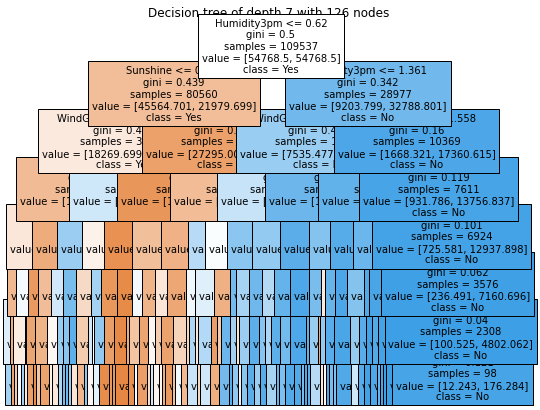

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight balanced
criterion gini
max_depth 7
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 5
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state 42
splitter best
---------------------------------------------------------------------------------


In [36]:
plot_decision_tree(estimator.best_estimator_, feature_names)


Slucajne sume

In [37]:
Forest_model = RandomForestClassifier(random_state=42,class_weight='balanced')


In [38]:
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 5, 10],
#'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

In [39]:
#grid_search_RF = GridSearchCV(Forest_model, param_grid, scoring='accuracy', cv=5)


In [40]:
Forest_model.fit(X_train, Y_train)
#grid_search_RF.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22064
           1       0.78      0.46      0.58      6375

    accuracy                           0.85     28439
   macro avg       0.82      0.71      0.75     28439
weighted avg       0.84      0.85      0.84     28439

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
        No   Yes
No   21248   816
Yes   3427  2948
---------------------------------------------------------------------------------


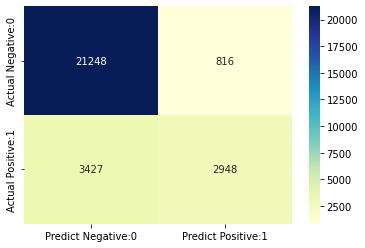

In [41]:
report(Forest_model, X_test, Y_test, "test")


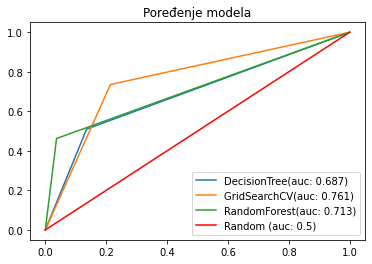

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [tree, estimator.best_estimator_, Forest_model]
model_names = ['DecisionTree', 'GridSearchCV', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 3)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()


In [43]:
#losa tacnost, popraviti

In [44]:
with open('RandomTreeModel.pkl', 'wb') as file:  
    joblib.dump(tree, file)

with open('RandomTreeModel.pkl', 'rb') as file:
    # Call load method to deserialze
    loaded_model = joblib.load(file)


In [45]:
with open('BestEstimator.pkl', 'wb') as file:  
    joblib.dump(estimator.best_estimator_, file)

with open('BestEstimator.pkl', 'rb') as file:
    # Call load method to deserialze
    loaded_model = joblib.load(file)

In [46]:
with open('Forrest.pkl', 'wb') as file:  
    joblib.dump(Forest_model, file)

with open('Forrest.pkl', 'rb') as file:
    # Call load method to deserialze
    loaded_model = joblib.load(file)